In [36]:
!nvidia-smi

Mon Oct 28 01:14:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.06             Driver Version: 535.183.06   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      On  | 00000000:B5:00.0 Off |                    0 |
| N/A   59C    P0              31W /  72W |  13486MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)

from datasets import Dataset  # Assuming you're using Hugging Face's datasets library
from datasets import Dataset, Features, Value  # Import Features and Value from datasets library


from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig, pipeline
from peft import PeftModel
import torch
from trl import setup_chat_format


import matplotlib.pyplot as plt
from transformers import TrainerCallback, TrainingArguments, Trainer
from IPython.display import clear_output
import time
import torch


from peft import (
    LoraConfig,
    PeftModel,
    prepare_model_for_kbit_training,
    get_peft_model,
)
import os, torch
from datasets import load_dataset
from trl import SFTTrainer, setup_chat_format
from peft import LoraConfig
import os, torch
from datasets import load_dataset
from trl import SFTTrainer, setup_chat_format

from huggingface_hub import login

from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
    HfArgumentParser,
    TrainingArguments,
    pipeline,
    logging,
)
from peft import (
    LoraConfig,
    PeftModel,
    prepare_model_for_kbit_training,
    get_peft_model,
)
import pandas as pd
from huggingface_hub import login

import os, torch, wandb
from datasets import load_dataset
from trl import SFTTrainer, setup_chat_format


/home/xli27/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/xli27/.local/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
2024-10-28 01:14:25.709839: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 01:14:25.711888: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-28 01:14:25.748079: I tensorflow/core/platform/cpu_fea

sudo kill -9 277802

In [3]:

hf_token = "HUGGINGFACE_TOKEN"
login(token = hf_token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /home/xli27/.cache/huggingface/token
Login successful


# Using LoRA

In [10]:

login(token = hf_token)


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /home/xli27/.cache/huggingface/token
Login successful


In [12]:


# Defining the file path
file_path = '/home/recoil/shared_space/RECOIL_CGQA_Public/LLMAuto/finetunning/train-edited.parquet'

# Reading the parquet file
data = pd.read_parquet(file_path)


In [13]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows


In [15]:
data

,instruction,input,output
0,If you are an expert in sh script and curl que...,\n Check if Road is...,\n #!/bin/bash\n ...
1,If you are an expert in sh script and curl que...,\n Check if Renewab...,\n #!/bin/bash\n ...
2,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
3,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
4,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
5,If you are an expert in sh script and curl que...,\n Check if Diesel ...,\n #!/bin/bash\n ...
6,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
7,If you are an expert in sh script and curl que...,\n Check if eFT Fue...,\n #!/bin/bash\n ...
8,If you are an expert in sh script and curl que...,\n Use the output a...,\n #!/bin/sh\n ...
9,If you are an expert in sh script and curl que...,\n Use the output a...,\n #!/bin/sh\n ...


In [16]:
# data.loc[0].input

In [17]:
data.loc[0].output

'\n                        #!/bin/bash\n                        ENDPOINT_URL="https://portal.recoil.ise.utk.edu/api/crd/crd_mode/"\n                        SEARCH_QUERY="Road"\n                        if response=$(curl -s "$ENDPOINT_URL") &&                            [[ -n "$response" ]] &&                            echo "$response" | jq -e --arg query "$SEARCH_QUERY" \'[.[] | select(gsub(" "; "") == gsub(" "; "") | $query)] | any\' >/dev/null; then\n                          echo "$SEARCH_QUERY is a match."\n                        else\n                          echo "Error: No valid response or $SEARCH_QUERY is not a match."\n                        fi\n                        '

In [18]:
# data.loc[30]

In [19]:
# data.loc[30]

In [20]:
base_model = "google/gemma-2-9b-it"
# dataset_name = "lavita/ChatDoctor-HealthCareMagic-100k"
new_model = "gemma-2-9b-it-crag_new"

In [21]:
if torch.cuda.get_device_capability()[0] >= 8:
    !pip install -qqq flash-attn
    torch_dtype = torch.bfloat16
    attn_implementation = "flash_attention_2"
else:
    torch_dtype = torch.float16
    attn_implementation = "eager"

In [22]:
# QLoRA config
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch_dtype,
    bnb_4bit_use_double_quant=True,
)


In [23]:
# Load model
model = AutoModelForCausalLM.from_pretrained(
    base_model,
    quantization_config=bnb_config,
    device_map="auto",
    attn_implementation=attn_implementation
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [24]:
import bitsandbytes as bnb

def find_all_linear_names(model):
    cls = bnb.nn.Linear4bit
    lora_module_names = set()
    for name, module in model.named_modules():
        if isinstance(module, cls):
            names = name.split('.')
            lora_module_names.add(names[0] if len(names) == 1 else names[-1])
    if 'lm_head' in lora_module_names:  # needed for 16 bit
        lora_module_names.remove('lm_head')
    return list(lora_module_names)

modules = find_all_linear_names(model)

In [25]:
# LoRA config
peft_config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=modules
)
model, tokenizer = setup_chat_format(model, tokenizer)
model = get_peft_model(model, peft_config)

In [27]:
data

,instruction,input,output
0,If you are an expert in sh script and curl que...,\n Check if Road is...,\n #!/bin/bash\n ...
1,If you are an expert in sh script and curl que...,\n Check if Renewab...,\n #!/bin/bash\n ...
2,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
3,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
4,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
5,If you are an expert in sh script and curl que...,\n Check if Diesel ...,\n #!/bin/bash\n ...
6,If you are an expert in sh script and curl que...,\n Execute the quer...,\n #!/bin/bash\n ...
7,If you are an expert in sh script and curl que...,\n Check if eFT Fue...,\n #!/bin/bash\n ...
8,If you are an expert in sh script and curl que...,\n Use the output a...,\n #!/bin/sh\n ...
9,If you are an expert in sh script and curl que...,\n Use the output a...,\n #!/bin/sh\n ...


In [28]:
dataset = Dataset.from_pandas(data)

# Shuffle and select a subset of the dataset
dataset = dataset.shuffle(seed=65)#.select(range())  # Use only 10 samples for a quick demo

# Assuming 'tokenizer' is defined and applied correctly
def format_chat_template(row):
    row_json = [
        {"role": "system", "content": row["instruction"]},
        {"role": "user", "content": row["input"]},
        {"role": "assistant", "content": row["output"]}
    ]
    row["text"] = tokenizer.apply_chat_template(row_json, tokenize=False)  # Ensure tokenizer is defined
    return row

# Step 4: Map the formatting function over the dataset
dataset = dataset.map(
    format_chat_template,
    num_proc=4,
)

# Now the dataset is ready for further processing
print(dataset)

Map (num_proc=4):   0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset({
    features: ['instruction', 'input', 'output', 'text'],
    num_rows: 1000
})


In [29]:
dataset = dataset.train_test_split(test_size=0.1)

In [30]:
dataset

DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output', 'text'],
        num_rows: 900
    })
    test: Dataset({
        features: ['instruction', 'input', 'output', 'text'],
        num_rows: 100
    })
})

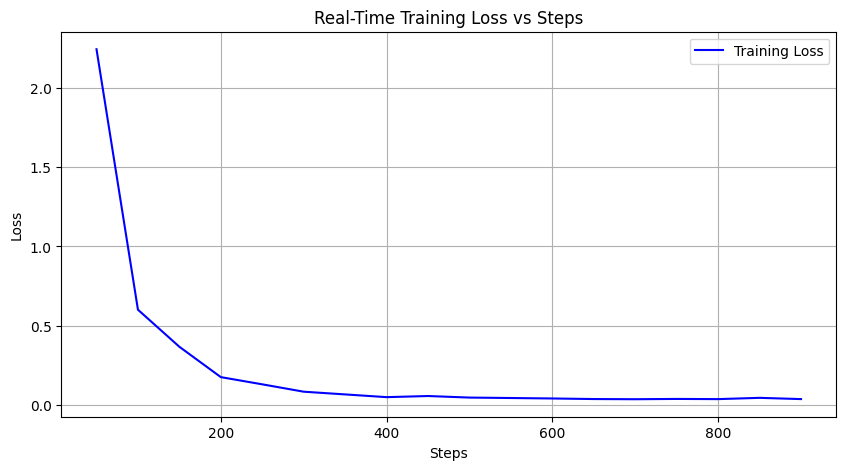

/home/xli27/.local/lib/python3.10/site-packages/peft/utils/save_and_load.py:257: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


TrainOutput(global_step=900, training_loss=0.2291696238517761, metrics={'train_runtime': 1645.8775, 'train_samples_per_second': 0.547, 'train_steps_per_second': 0.547, 'total_flos': 9586359360614400.0, 'train_loss': 0.2291696238517761, 'epoch': 1.0})

In [31]:
# Clear cache to avoid memory issues
torch.cuda.empty_cache()

# Callback to record the loss values and update the plot in real-time
class RealTimeLossCallback(TrainerCallback):
    def __init__(self):
        self.train_loss = []
        self.steps = []

    def on_log(self, args, state, control, logs=None, **kwargs):
        # Logs the training loss and updates the plot in real-time
        if "loss" in logs:
            self.train_loss.append(logs["loss"])
            self.steps.append(state.global_step)
            
            # Clear the previous plot
            clear_output(wait=True)
            
            # Plot updated training loss
            plt.figure(figsize=(10, 5))
            plt.plot(self.steps, self.train_loss, label="Training Loss", color="blue")
            plt.xlabel("Steps")
            plt.ylabel("Loss")
            plt.title("Real-Time Training Loss vs Steps")
            plt.legend()
            plt.grid()
            plt.show()
            
            # Allow time for the plot to render in real-time
            time.sleep(0.1)

# Initialize the callback
real_time_callback = RealTimeLossCallback()

# Adjusted training arguments to reduce memory usage
training_arguments = TrainingArguments(
    output_dir=new_model,
    per_device_train_batch_size=1,  # Reduced batch size
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=1,  # Lowered gradient accumulation
    optim="paged_adamw_32bit",
    num_train_epochs=1,
    eval_strategy="steps",
    eval_steps=100,
    logging_steps=50,
    warmup_steps=50,  # Reduced warmup steps for quicker stabilization
    logging_strategy="steps",
    learning_rate=3e-5,
    lr_scheduler_type="cosine",
    fp16=False,           # Disable fp16 to reduce memory usage, unless supported by hardware
    bf16=True if torch.cuda.is_bf16_supported() else False,  # Enable bf16 if available
    group_by_length=True,
    report_to=["none"]
)

# Set up the trainer with the real-time callback
trainer = SFTTrainer(
    model=model,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    peft_config=peft_config,
    max_seq_length=256,  # Reduced sequence length
    dataset_text_field="text",
    tokenizer=tokenizer,
    args=training_arguments,
    packing=False,
    callbacks=[real_time_callback]
)

# Train the model
model.config.use_cache = False
trainer.train()



In [32]:
# wandb.finish()
model.config.use_cache = True

In [33]:
trainer.model.save_pretrained(new_model)
trainer.model.push_to_hub(new_model, use_temp_dir=False)

/home/xli27/.local/lib/python3.10/site-packages/peft/utils/save_and_load.py:257: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(


adapter_model.safetensors:   0%|          | 0.00/3.89G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/jtupayac/gemma-2-9b-it-crag_new/commit/f798146104a2ded6303a87b09d7c95e39b49f117', commit_message='Upload model', commit_description='', oid='f798146104a2ded6303a87b09d7c95e39b49f117', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jtupayac/gemma-2-9b-it-crag_new', endpoint='https://huggingface.co', repo_type='model', repo_id='jtupayac/gemma-2-9b-it-crag_new'), pr_revision=None, pr_num=None)

# Merging the Base Model with Adopter

In [35]:


base_model_url = "google/gemma-2-9b-it"
new_model_url = "jtupayac/gemma-2-9b-it-crag_new"

# Reload tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(base_model_url)

base_model_reload= AutoModelForCausalLM.from_pretrained(
    base_model_url,
    low_cpu_mem_usage=True,
    return_dict=True,
    torch_dtype=torch.float16,
    device_map="cpu",
)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [36]:
base_model_reload, tokenizer = setup_chat_format(base_model_reload, tokenizer)
model = PeftModel.from_pretrained(base_model_reload, new_model_url)

model = model.merge_and_unload()

adapter_config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/3.89G [00:00<?, ?B/s]

In [37]:
model.save_pretrained("gemma-2-9b-it-crag_new")
tokenizer.save_pretrained("gemma-2-9b-it-crag_new")

('gemma-2-9b-it-crag_new/tokenizer_config.json',
 'gemma-2-9b-it-crag_new/special_tokens_map.json',
 'gemma-2-9b-it-crag_new/tokenizer.model',
 'gemma-2-9b-it-crag_new/added_tokens.json',
 'gemma-2-9b-it-crag_new/tokenizer.json')

In [40]:
model.push_to_hub("gemma-2-9b-it-crag_new", use_temp_dir=False)
tokenizer.push_to_hub("gemma-2-9b-it-crag_new", use_temp_dir=False)

model-00001-of-00004.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.67G [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/jtupayac/gemma-2-9b-it-crag_new/commit/a045f7a0a9697a3a0e5db714b5119ccd96177073', commit_message='Upload tokenizer', commit_description='', oid='a045f7a0a9697a3a0e5db714b5119ccd96177073', pr_url=None, repo_url=RepoUrl('https://huggingface.co/jtupayac/gemma-2-9b-it-crag_new', endpoint='https://huggingface.co', repo_type='model', repo_id='jtupayac/gemma-2-9b-it-crag_new'), pr_revision=None, pr_num=None)